We did this data analysis for our class assignment

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
#loading the dataset
df = pd.read_excel('Online Retail.xlsx')
print(df.shape)
df.head(10)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
# Check any duplicated data set and column formats
print(sum(df.duplicated(keep="first")),"transaction rows affected")
df.dtypes

5268 transaction rows affected


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [4]:
#remove duplicate rows from dataset, reformatting columns and defining new fields for data exploration
df=df.drop_duplicates()
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.StockCode=df.StockCode.str.upper() #to see if can separate some more
df.rename(columns={"InvoiceDate":'InvoiceDateTime'}, inplace=True)
df['InvoiceDate'] = pd.to_datetime([dt.datetime.date(d) for d in df['InvoiceDateTime']]) #to extract date only from datetime info
#df['InvoiceTime'] = df['InvoiceDateTime'].dt.time #to extract time only from datetime info
df['mth_end_dt'] = df['InvoiceDate']+pd.offsets.MonthEnd(0) #to get month end date position
df.shape

(536641, 10)

In [5]:
#summary of the numeric and object columns
print(df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
df.describe(include=[np.object])

            Quantity      UnitPrice
count  536641.000000  536641.000000
mean        9.620029       4.632656
std       219.130156      97.233118
min    -80995.000000  -11062.060000
1%         -2.000000       0.190000
5%          1.000000       0.420000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
95%        30.000000       9.950000
99%       100.000000      18.000000
max     80995.000000   38970.000000


,InvoiceNo,StockCode,Description,CustomerID,Country
count,536641,536641,535187,401604,536641
unique,25900,3958,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2368,2357,7812,490300



Discoveries: 
1.Existence of outliers in Quantity. 99% of data have quantity up until 100 but max and min quantities are 5 figure digits. 
2.Existence of outliers in UnitPrice. Interquartile range of UnitPrices is between 0.42 sterling until 4.13 sterling however min and max UnitPrice are 5 figure digits. 
3.Existence of negative quantities and unitprices. 
4.Number of unique values and in each object columns.

In [6]:
#We count the negative value of of quantity and Unit Price
print("The number of rows with negative Quantity:",sum(n < 0 for n in df.Quantity))
print("The number of rows with negative UnitPrice:",sum(n < 0 for n in df.UnitPrice))

The number of rows with negative Quantity: 10587
The number of rows with negative UnitPrice: 2


In [7]:
#Count Unique value in all dataset columns
df.nunique()

InvoiceNo          25900
StockCode           3958
Description         4223
Quantity             722
InvoiceDateTime    23260
UnitPrice           1630
CustomerID          4372
Country               38
InvoiceDate          305
mth_end_dt            13
dtype: int64

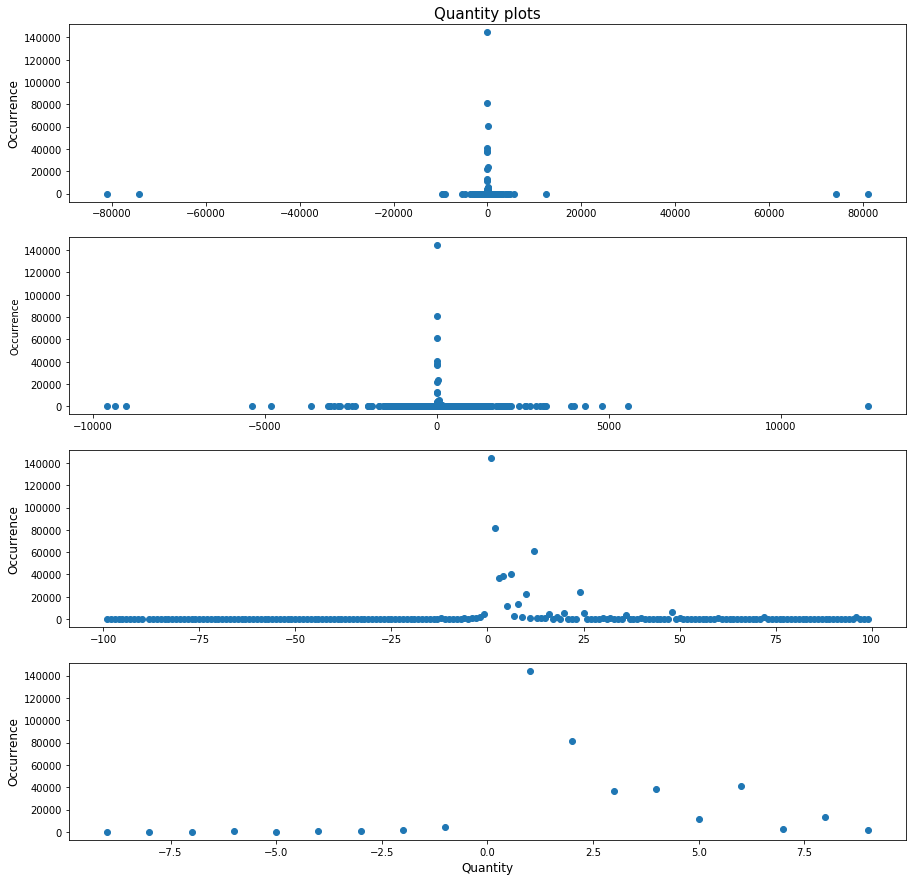

In [8]:
#visualising Quantity
#will someone consider modifying this into boxplot?

plt.figure(figsize=(15,15))

x=df.Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(411) #1st digit #rows, 2nd digit #columns, 3rd digit plot number
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['Quantity'].abs()<20000].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence')

#Based on 99th percentile
x=df[df['Quantity'].abs()<100].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#Based on 3rd quartile
x=df[df['Quantity'].abs()<10].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Occurrence',fontsize=12)

plt.show()


Discovery: 
1.Most abs(Quantity)<20000 range. Each positive range also seem to have a negative equivalent counterpart

In [9]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['Quantity'].abs()>60000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,2011-01-31
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,2011-01-31
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011-12-09,2011-12-31
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,2011-12-09,2011-12-31


In [10]:

#1.Quantity outliers due to customer making mistake in their order, and it has been cancelled. Can be removed from the #dataset. 
#2.The mistake order is offset by another transaction, given a different invoicedate and invoiceno. The only common field #shared is the stockcode, customerID and quantity ordered. 
#3. Invoices cancelled will have the letter C in front of the 6 digit invoiceno. 

In [11]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[(df['Quantity'].abs()>5000) & (df['Quantity'].abs()<20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,2010-12-02,2010-12-31
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,2011-01-28,2011-01-31
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,NaN,United Kingdom,2011-03-09,2011-03-31
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,2011-11-25,2011-11-30


#Discovery: 
#1.Length of stockcode is not restricted to 5 only. 
#2.Existence of non-existing and weird descriptions in Description field. 
#3.Existence of non-existing CustomerID.

In [12]:
#Check how NaN values affect the dataset
print('Number of rows in each column affected by existence of non-existing values:')
df.isnull().sum()

Number of rows in each column affected by existence of non-existing values:


InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDateTime         0
UnitPrice               0
CustomerID         135037
Country                 0
InvoiceDate             0
mth_end_dt              0
dtype: int64

#It seem like we have Nan of: 
#1454 in Description 
#135037 in Customer ID

In [13]:
#Now lets check what is in our negative quantity
df[df["Quantity"]<=0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12-01,2010-12-31
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,2010-12-31
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,2010-12-01,2010-12-31
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,2010-12-01,2010-12-31


In [14]:
#Access all the NaN element in the Description discovered earlier when checking number of rows affected with missing values
#from IPython.display import display, HTML
#dfNADescription=df[df.Description.isnull()]
print('Descriptive statistics of numeric columns:\n',df[df.Description.isnull()].describe())
print('\nDescriptive statistics of CustomerID columns:\n',df[df.Description.isnull()].CustomerID.describe())

Descriptive statistics of numeric columns:
           Quantity  UnitPrice
count  1454.000000     1454.0
mean     -9.359697        0.0
std     243.238758        0.0
min   -3667.000000        0.0
25%     -24.000000        0.0
50%      -3.000000        0.0
75%       4.000000        0.0
max    5568.000000        0.0

Descriptive statistics of CustomerID columns:
 count     0
unique    0
Name: CustomerID, dtype: int64


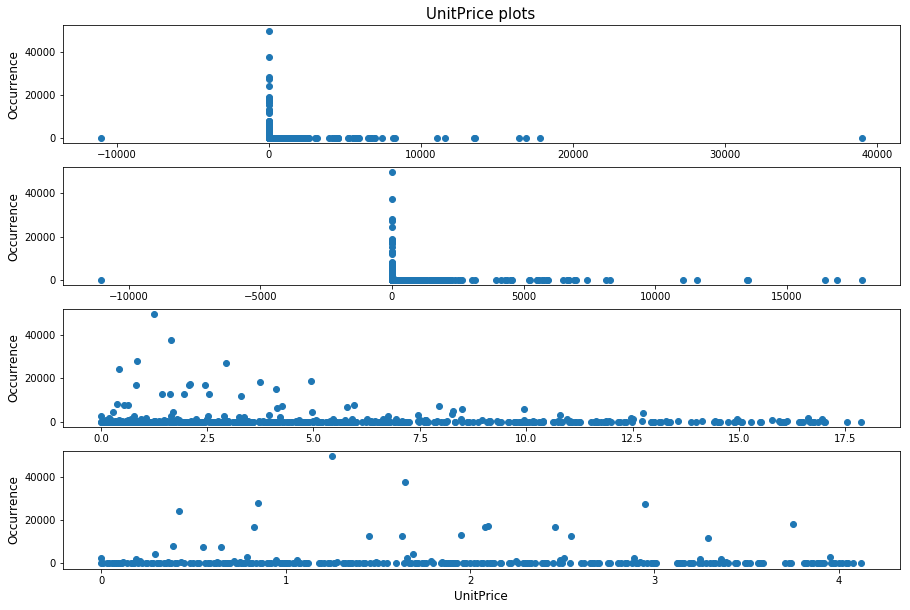

In [15]:
#plot price to see outliers
#since describe reveal that min and max quantities are in the range >10000 as compared to most sections of the dataset

plt.figure(figsize=(15,10))

x=df.UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(411)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['UnitPrice'].abs()<20000].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#99th-percentile
x=df[df['UnitPrice'].abs()<18].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#3rd quartile
x=df[df['UnitPrice'].abs()<4.13].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)
plt.xlabel('UnitPrice',fontsize=12)

plt.show()

In [16]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['UnitPrice'].abs()>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,2010-12-07,2010-12-31
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,2011-01-05,2011-01-31
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,2011-01-05,2011-01-31
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,2011-06-10,2011-06-30
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,2011-08-12,2011-08-31
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011-08-12,2011-08-31
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011-08-12,2011-08-31


In [17]:
#The stockcodes aren't linked to any other item purchases - single item per invoice.
df[df['InvoiceNo']=='537632']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31


In [18]:
#Investigating stockcode and invoiceno fields based on discoveries made

#defining the variables
df['length_stockcode']=df.StockCode.str.len()
df['length_invoiceno']=df.InvoiceNo.str.len()
df['invoiceno_letter1']=df['InvoiceNo'].str[0]

print("length of InvoiceNo:\n",df.length_invoiceno.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of InvoiceNo'}))
print("\nFirst letter for invoice:\n",df.invoiceno_letter1.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'invoice first letter'}))
print("\nCross table first letter for invoice against invoiceno length:\n"\
      ,pd.crosstab(df['invoiceno_letter1'],df['length_invoiceno'],margins=True))
print("\nlength of StockCode:\n",df.length_stockcode.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of StockCode'})) 

length of InvoiceNo:
    length of InvoiceNo  no_rows
0                    6   527387
1                    7     9254

First letter for invoice:
   invoice first letter  no_rows
0                    5   527387
1                    C     9251
2                    A        3

Cross table first letter for invoice against invoiceno length:
 length_invoiceno        6     7     All
invoiceno_letter1                      
5                  527387     0  527387
A                       0     3       3
C                       0  9251    9251
All                527387  9254  536641

length of StockCode:
    length of StockCode  no_rows
0                    5   482154
1                    6    51108
2                    4     1276
3                    3      710
4                    1      709
5                    7      390
6                    2      144
7                   12       71
8                    9       48
9                    8       31


In [19]:

#Discoveries: 
#1.Invoice length is either 6 or 7; those with length 7 will start with letter A or C 
#2.Since most rows have StockCode of length 5 or 6, this is considered the legitimate StockCode referring to item description. 
#4.StockCode length is between 1 to 12 (excl. 10 and 11)

In [20]:
#display what are the unique stockcodes for invoiceno with length below 5 or above 8
print("\nDescription for StockCode with length below 5 or above 8 and number of lines affected:")
      #\n"\
#      ,df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
#      [['length_stockcode','invoiceno_letter1','StockCode','Description']]\
#      .groupby(by=['invoiceno_letter1','length_stockcode','StockCode']).Description.value_counts().reset_index(name='Freq'))

df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode','invoiceno_letter1']).Description.value_counts().reset_index(name='Freq')


Description for StockCode with length below 5 or above 8 and number of lines affected:


,length_stockcode,StockCode,invoiceno_letter1,Description,Freq
0,1,B,A,Adjust bad debt,3
1,1,D,C,Discount,77
2,1,M,5,Manual,323
3,1,M,C,Manual,244
4,1,S,5,SAMPLES,2
5,1,S,C,SAMPLES,60
6,2,C2,5,CARRIAGE,141
7,2,C2,C,CARRIAGE,2
8,3,DOT,5,DOTCOM POSTAGE,708
9,3,DOT,C,DOTCOM POSTAGE,1



#Descoveries: 
#1.Retailer is dotcomgiftshop. Gift voucher is part of their product offering. Website: https://www.dotcomgiftshop.com 
#2.StockCode with length<=4 have nothing to do with items at all. 
#3.In StockCodes with length 9 or 12, some descriptions does not refer to product item descriptions (AMAZONFEE and BANK CHARGES)

In [21]:
#analysing stockcode and invoiceno field

#display what are the unique stockcodes for invoiceno of length 7 or 8
print("\nDescription for StockCode with length 7 or 8 and number of lines affected:\n")
df[(df['length_stockcode']==7) | (df['length_stockcode']==8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode']).Description.value_counts().reset_index(name='freq')


Description for StockCode with length 7 or 8 and number of lines affected:



,length_stockcode,StockCode,Description,freq
0,7,15056BL,EDWARDIAN PARASOL BLACK,388
1,7,79323GR,"Unsaleable, destroyed.",1
2,7,79323LP,"Unsaleable, destroyed.",1
3,8,DCGS0003,BOXED GLASS ASHTRAY,4
4,8,DCGS0003,ebay,1
5,8,DCGS0004,HAYNES CAMPER SHOULDER BAG,1
6,8,DCGS0067,ebay,1
7,8,DCGS0068,ebay,1
8,8,DCGS0069,OOH LA LA DOGS COLLAR,1
9,8,DCGS0069,ebay,1


In [22]:
#From initial assessment, we found out most problematic description contain lower case letter and '?' symbol
df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)].\
drop(['mth_end_dt','length_stockcode','length_invoiceno','invoiceno_letter1'],axis=1).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,2010-12-03
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,2010-12-06
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,2010-12-06
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,2010-12-06
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom,2010-12-07
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom,2010-12-09
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom,2010-12-09
24290,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,NaN,United Kingdom,2010-12-10


Seems like all the error description have:
<br>1.null CustomerID 
<br>2.UnitPrice=0 
<br>Test if using these criteria will only eliminate weird descriptions:

In [23]:
print('no of rows affected:',df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)].shape[0])
df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)]\
.Description.value_counts().reset_index(name='freq').rename(columns={'index':'Description'}).head(20)

no of rows affected: 2470


,Description,freq
0,check,159
1,?,47
2,damages,45
3,damaged,43
4,found,25
5,sold as set on dotcom,20
6,adjustment,16
7,Damaged,14
8,FRENCH BLUE METAL DOOR SIGN 1,9
9,"Unsaleable, destroyed.",9


Seems like it also removes some valid product descriptions, but these products have UnitPrices = 0 which is not expected. The file containing these transactions can be passed to data owner for investigation purposes.****

**DATA CLEANING**

In [24]:
#perform modification on df1
df1=df.copy()
df1.shape

(536641, 13)

In [25]:
#1. Separate missing description rows
df.NAdesc=df1[(df1.Description.isnull())]
print(df.NAdesc.shape)
df.NAdesc.to_csv('No descriptions.csv',index=False)
df1=df1[~(df1.Description.isnull())]
print(df1.shape)

(1454, 13)
(535187, 13)


In [26]:
#2. Separate length-stockcode<5, StockCode=['AMAZONFEE','BANK CHARGES']
df.otherdesc=df1[(df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES')]
print(df.otherdesc.shape)
df.otherdesc.to_csv('Other descriptions.csv',index=False)
df1=df1[~((df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES'))]
print(df1.shape)

(2904, 13)
(532283, 13)


In [27]:
#3. Remove rows that contain problematic description and UnitPrice=0 into a new file.
df.weird=df1[(df1.CustomerID.isnull()) & (df1['UnitPrice']==0)]
print(df.weird.shape)
df.weird.to_csv('weird description and or unitprice.csv',index=False)
df1=df1[~((df1.CustomerID.isnull()) & (df1['UnitPrice']==0))]
print(df1.shape)

(1014, 13)
(531269, 13)


In [28]:
#4. to remove Cancelled transactions into a separate dataset
df.Cancel=df1[df1['invoiceno_letter1']=='C']
print(df.Cancel.shape)
df.Cancel.to_csv('Cancelled Transactions v2.csv',index=False)
df1=df1[df1['invoiceno_letter1']!='C']
print(df1.shape)
#we have 9251 row of cancelled transaction

(8668, 13)
(522601, 13)


In [29]:
#1. Assign value to our missing customerID based on the Invoice Number
df1["CustomerID"].fillna("R"+df1["InvoiceNo"], inplace=True)
df.CustomerID.value_counts(sort=True)
NewID = df1.groupby(['CustomerID','Description']).sum()
NewID.head()

Quantity  UnitPrice  \
CustomerID Description                                           
12346      MEDIUM CERAMIC TOP STORAGE JAR     74215       1.04   
12347      3D DOG PICTURE PLAYING CARDS         126      14.75   
           3D SHEET OF CAT STICKERS              12       0.85   
           3D SHEET OF DOG STICKERS              12       0.85   
           60 TEATIME FAIRY CAKE CASES           72       1.65   

                                           length_stockcode  length_invoiceno  
CustomerID Description                                                         
12346      MEDIUM CERAMIC TOP STORAGE JAR                 5                 6  
12347      3D DOG PICTURE PLAYING CARDS                  30                30  
           3D SHEET OF CAT STICKERS                       6                 6  
           3D SHEET OF DOG STICKERS                       6                 6  
           60 TEATIME FAIRY CAKE CASES                   15                18

In [30]:
#Check if there is any lowercase letter in stock code
df1[df1['StockCode'].str.contains("[a-z]",case=True, na=False)]
#No lowercase code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [31]:
#Now let check of negative Quantity
df1[df1["Quantity"]<=0]
#Our negative quantity is zero as most of our negative quantity are inside Nan Description that we removed earlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [32]:
#we check if our problematic Description got removed by the drop negative and zero unit price
from IPython.display import display, HTML
df1.prob=df1[df1['Description'].str.contains("^[a-z]|\\?",case=True, na=False)]
df1.prob1=df1.prob.Description.str.split(expand=True).stack().value_counts().to_frame().reset_index()
HTML(df1.prob1.to_html())
#Our hypothesis is true as all the problematic description also got removed by our previous droping actvities

,index,0


In [33]:
#Now let check if the result of our cleaning process
df1.describe()
# We no longer have negative value for our numeric column

,Quantity,UnitPrice,length_stockcode,length_invoiceno
count,522601.000000,522601.000000,522601.00000,522601.0
mean,10.668357,3.274861,5.09752,6.0
std,157.542354,4.396005,0.30413,0.0
min,1.000000,0.000000,5.00000,6.0
25%,1.000000,1.250000,5.00000,6.0
50%,4.000000,2.080000,5.00000,6.0
75%,12.000000,4.130000,5.00000,6.0
max,80995.000000,649.500000,12.00000,6.0


In [34]:
df1.isnull().sum()
#All our Nan have been removed from the description

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDateTime      0
UnitPrice            0
CustomerID           0
Country              0
InvoiceDate          0
mth_end_dt           0
length_stockcode     0
length_invoiceno     0
invoiceno_letter1    0
dtype: int64

In [35]:
#Check if our new customer ID that been assigned with "R" + InvoiceNo
df1[df1['CustomerID'].str.contains("R",case=False, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5


In [36]:
# Check again for any Nan Value
df1.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDateTime      0
UnitPrice            0
CustomerID           0
Country              0
InvoiceDate          0
mth_end_dt           0
length_stockcode     0
length_invoiceno     0
invoiceno_letter1    0
dtype: int64

In [37]:
df1.nunique()

InvoiceNo            19776
StockCode             3803
Description           4017
Quantity               375
InvoiceDateTime      18335
UnitPrice              501
CustomerID            5706
Country                 38
InvoiceDate            305
mth_end_dt              13
length_stockcode         6
length_invoiceno         1
invoiceno_letter1        1
dtype: int64

In [38]:
df1.StkDsc=df1.groupby("StockCode")['Description'].nunique().reset_index()
df1stk=df1.StkDsc[df1.StkDsc["Description"]>1]
df1stk.head()
#We have 215 row of stock code that have more than 1 description

,StockCode,Description
42,16156L,2
100,17107D,3
118,20622,2
170,20725,2
265,20914,2


DATA VISUALIZATION


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns
plotly.tools.set_credentials_file(username='JLLam', api_key='rHULPcQZPrG6MrCNj0VC')
plotly.tools.set_config_file(world_readable=True,sharing='public')

In [40]:
df2 = df1.copy()
df2["Revenue"]=df2["Quantity"]*df2["UnitPrice"]

In [41]:
#Calculte the total Revenue thorught out the year
df2.Revenue.sum()

10247905.130003804

In [42]:
#Produce total revenue by months by descending value
df2.groupby(df2['InvoiceDate'].dt.strftime('%B %Y'))['Revenue'].sum().sort_values()

InvoiceDate
February 2011      507866.54
April 2011         515469.66
December 2011      614499.25
January 2011       670439.46
July 2011          688252.67
March 2011         689841.84
August 2011        724308.16
June 2011          737683.99
May 2011           740036.33
December 2010      775714.95
September 2011    1028345.38
October 2011      1103330.92
November 2011     1452115.98
Name: Revenue, dtype: float64

In [43]:
#Group the data set by days of month
df2.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')

,InvoiceDate,Revenue
0,2010-12-01,57442.33
1,2010-12-02,47596.42
2,2010-12-03,44788.90
3,2010-12-04,NaN
4,2010-12-05,30908.67
5,2010-12-06,51667.12
6,2010-12-07,81454.99
7,2010-12-08,44153.98
8,2010-12-09,49992.52
9,2010-12-10,56688.13


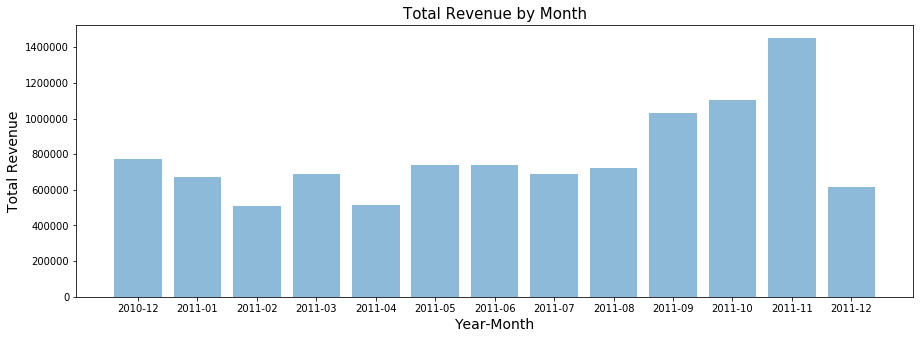

In [44]:
#Visualize visualize Revenue by Month
temp = df2.loc[:,('InvoiceDate','Revenue')]
temp.InvoiceDate = df2.InvoiceDate.dt.to_period('M')
temp = temp.groupby(['InvoiceDate'])['Revenue'].sum()
temp = temp.reset_index(drop = False)


plt.figure(figsize=(15,5))
plt.bar(np.arange(len(temp['InvoiceDate'])), temp['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp['InvoiceDate'])), temp['InvoiceDate'])
plt.ylabel('Total Revenue',fontsize=14)
plt.xlabel('Year-Month',fontsize=14)
plt.title('Total Revenue by Month',fontsize=15)
 
plt.show()

In [45]:
#Now group the revenue by week
df2.RevWeek=df2.groupby(pd.Grouper(key='InvoiceDate', freq='W-MON'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df2.RevWeek.head()

,InvoiceDate,Revenue
0,2010-12-06,232403.44
1,2010-12-13,285989.94
2,2010-12-20,197556.75
3,2010-12-27,59764.82
4,2011-01-03,NaN


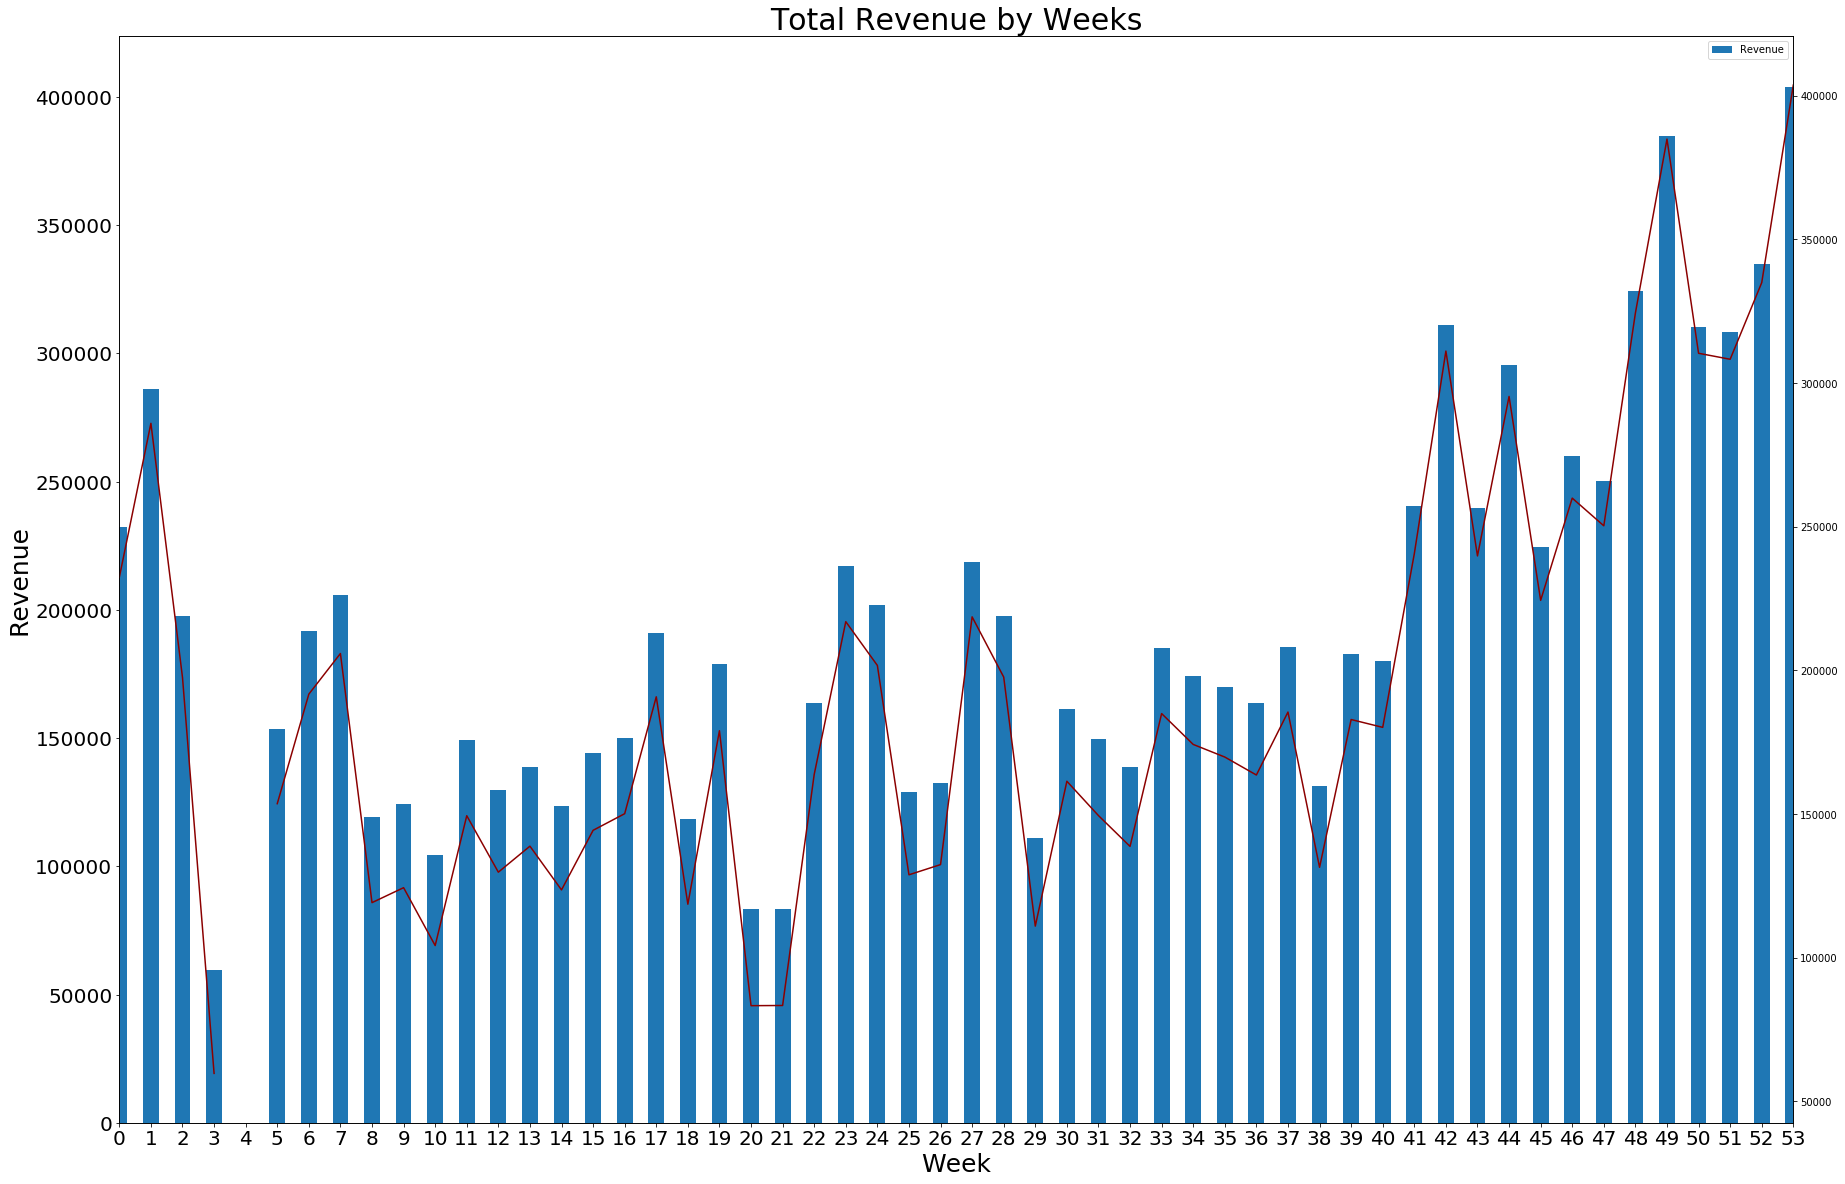

In [46]:
# Now we combine our weekly revenue line chart with weekly revenue bar chart for better visualization
#On the 4th week, there was no transaction
Revenue1=df2.RevWeek.Revenue
Time1 =df2.RevWeek.InvoiceDate
df2.RevWeek.plot(kind='bar', title ="Total Revenue By Week", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Weeks',fontsize=30)
plt.xlabel("Week",fontsize=25)
plt.ylabel("Revenue",fontsize=25)
df2.RevWeek['Revenue'].plot(secondary_y=True,color="#8b0000")
plt.show()
#we found out that our sales start to surge on week 41 onwards

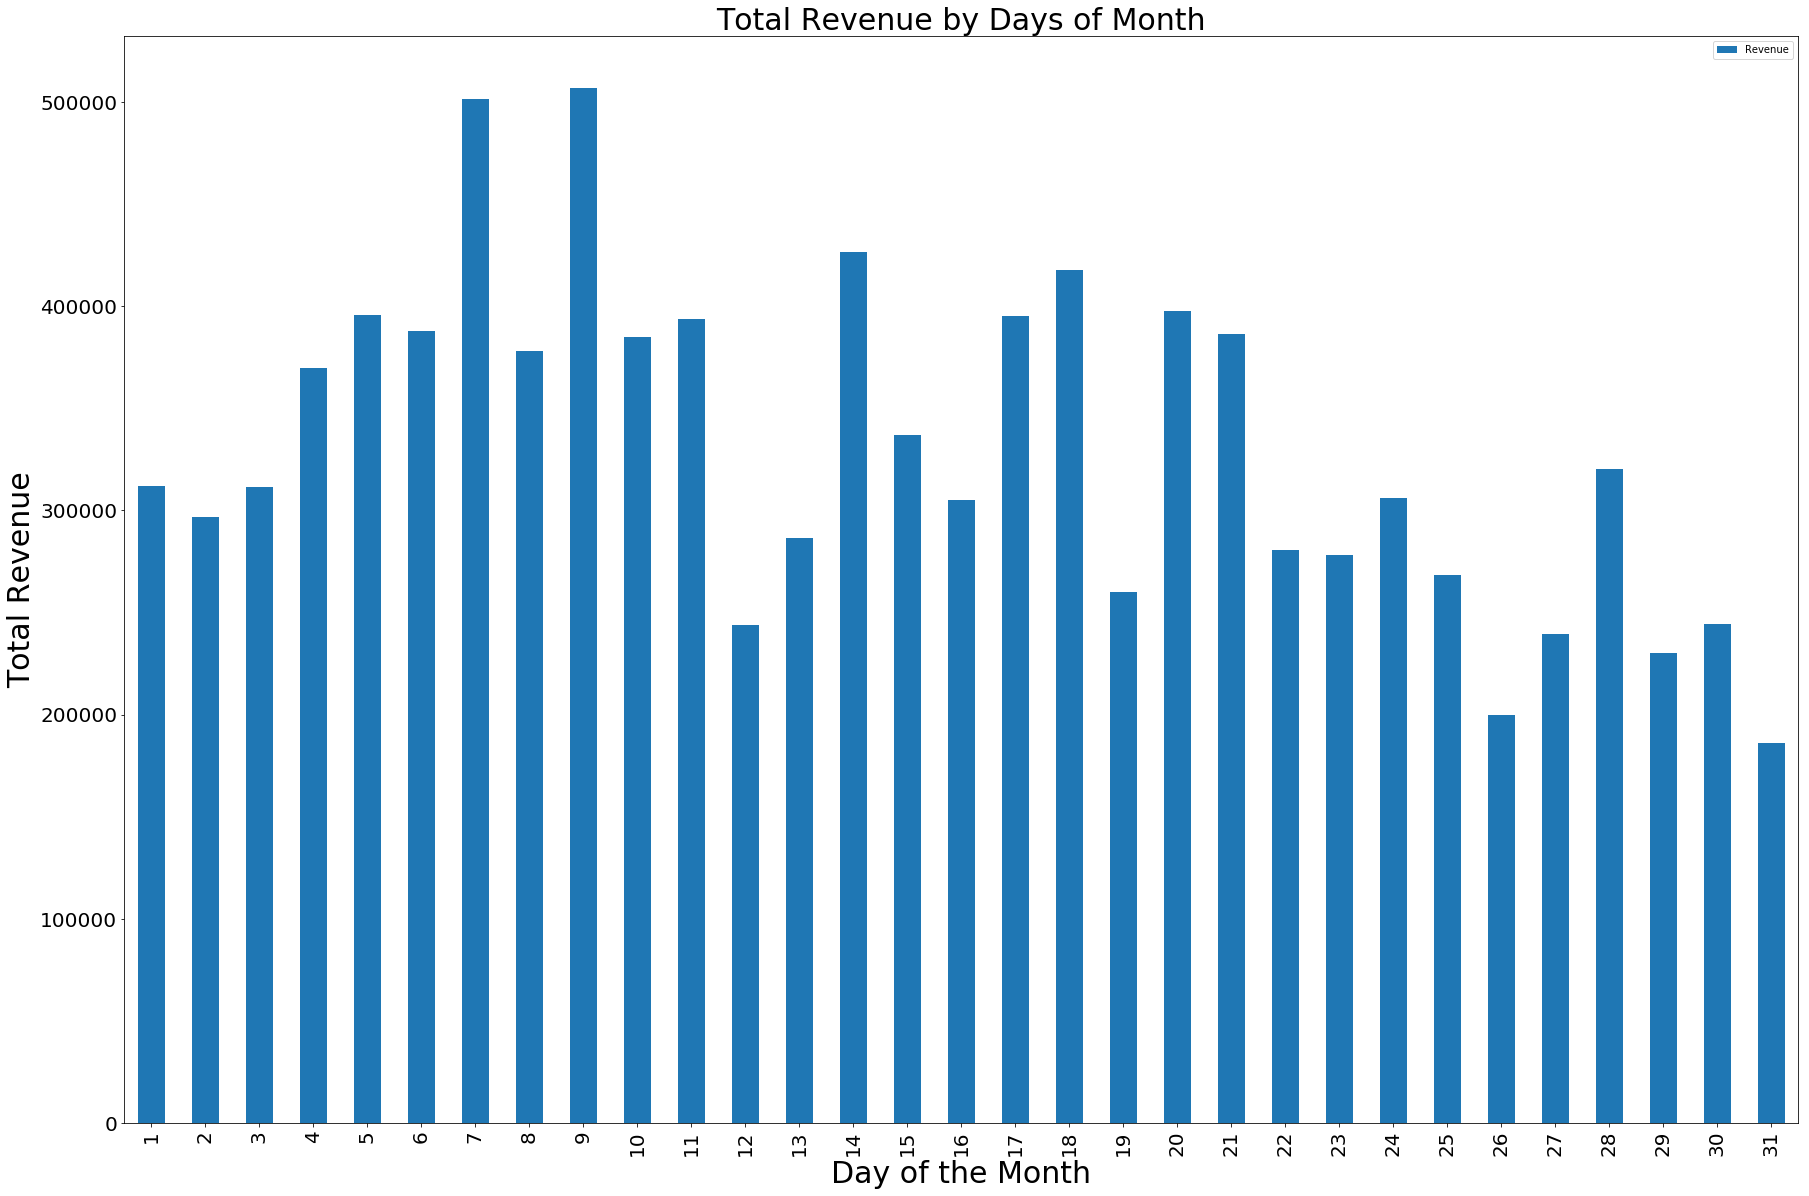

In [47]:
#We are going to investigate sales by days of the month
df_Dmonth=df2.copy()
df_Dmonth["day"]=df_Dmonth["InvoiceDate"].dt.day

df_Dmontha=df_Dmonth.groupby("day")["Revenue"].sum()
df_Dmontha.plot(kind='bar', title ="V comp", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Days of Month',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel('Day of the Month', fontsize=30)
plt.show()
# we concluded that the sale surge at the earlu of the monthand  dwindle as it reach the end of month

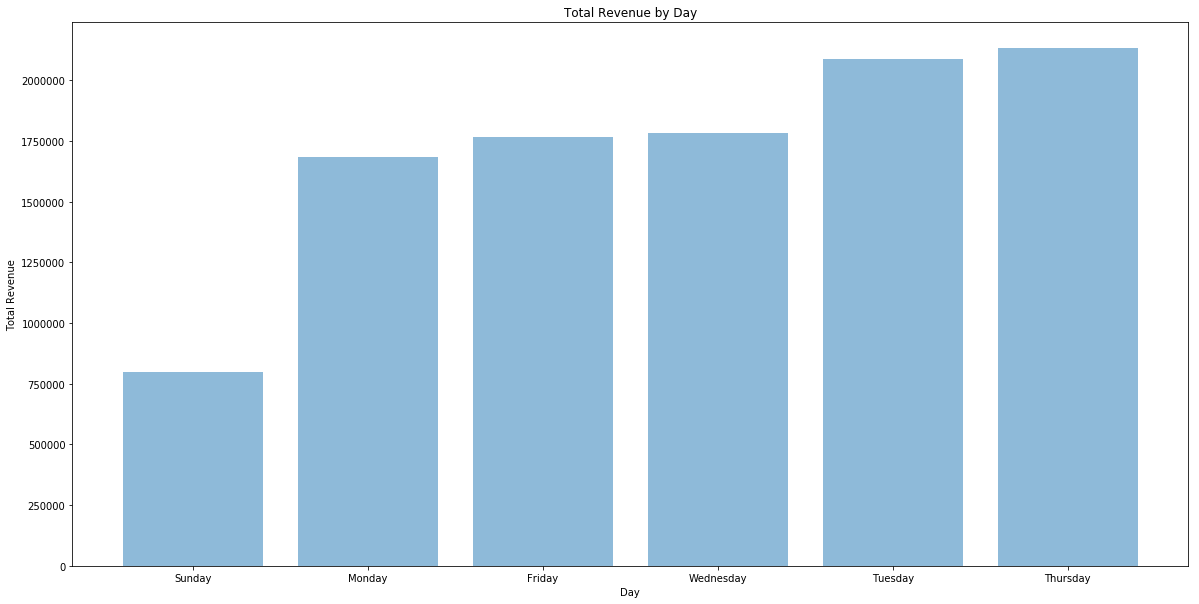

In [48]:
#To visualize Revenue by Day of the week
temp = df2.loc[:,('InvoiceDate','Revenue','CustomerID','InvoiceNo')]
temp2 = temp.groupby(temp['InvoiceDate'].dt.weekday_name)['Revenue'].sum().sort_values()
temp2 = temp2.reset_index(drop = False).rename(columns={'InvoiceDate':'Day'})


plt.figure(figsize=(20,10))
plt.bar(np.arange(len(temp2['Day'])), temp2['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp2['Day'])), temp2['Day'])
plt.ylabel('Total Revenue')
plt.xlabel('Day')
plt.title('Total Revenue by Day')
 
plt.show()
#Tuesday and thursday show the highest revenue, No revenue on Saturday